# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [2]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)
    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]
    
    return (x_subset, y_subset)

In [3]:
# read the data from the csv files into dataframes
train_data = pd.read_csv('Bikeshare_train_proc.csv')
test_data = pd.read_csv('Bikeshare_test_proc.csv')

# drop the column that indexes the results, since this column shouldn't factor into our model
train_data = train_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.drop('Unnamed: 0', axis = 1)

In [4]:
pred_names = train_data.loc[:, train_data.columns != 'count'].columns.values
predictors = list(pred_names)

X_train = train_data[predictors].values
Y_train = train_data['count'].values

X_test = test_data[predictors].values
Y_test = test_data['count'].values

### Ridge regression

In [5]:
ridge_regression = RidgeCV(fit_intercept=True)
ridge_regression.fit(X_train, Y_train)
train_r2 = ridge_regression.score(X_train, Y_train)
test_r2 = ridge_regression.score(X_test, Y_test)

print('Ridge regression model:\n {} + {}^T . x'.format(ridge_regression.intercept_, ridge_regression.coef_))
print('\n')
print('Train R^2:', train_r2)
print('\n')
print('Test R^2:', test_r2)

Ridge regression model:
 4403.487210740255 + [-231.53494722   30.89154048  587.29565415  516.92964932 -561.53849196
 -264.53288371 -745.32829604  -59.57622113 -217.9372862  -272.86739937
 -120.68279312   41.91517347  232.99350671   59.94448594 -350.53777598
 -563.66179047 -144.79542833  644.39918664  607.63011016  179.67528369
 -273.54707886 -209.31357692 -165.02623655   63.41778207   25.02328477
   85.25533989  473.81810219  453.3999449 ]^T . x


Train R^2: 0.559811303611


Test R^2: 0.265625962452


### Lasso regression

In [6]:
lasso_regression = LassoCV(fit_intercept=True)
lasso_regression.fit(X_train, Y_train)
train_r2 = lasso_regression.score(X_train, Y_train)
test_r2 = lasso_regression.score(X_test, Y_test)

print('Lasso regression model:\n {} + {}^T . x'.format(lasso_regression.intercept_, lasso_regression.coef_))
print('\n')
print('Train R^2:', train_r2)
print('\n')
print('Test R^2:', test_r2)

Lasso regression model:
 4155.356809825649 + [-193.05991591    0.          624.74014085  459.84667343 -555.9852239
 -248.24093378 -947.2281974    -0.         -211.46156178 -114.23464335
   -0.            2.77073859  111.85941618   -0.         -421.28644186
 -649.43472718 -102.68858836  738.6264484   674.98416232  117.98164325
 -304.27940951 -211.66598466 -150.78322308    0.           -0.
   17.72953907  801.69753681  777.06596068]^T . x


Train R^2: 0.564954582755


Test R^2: 0.271504479744


### Analysis

#### How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) from HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.

The estimated coefficients are of a ** noticebly smaller magnitude ** (less distance from 0) than the coefficients estimated by the plain linear regression in part(b) of HW 3. Here, the absolute value of the largest coefficient in the Ridge regression model is 745, whereas the absolute value of the largest coefficient from the plain linear regression was 1582. Most coefficients here have a smaller magnitude than in the plain linear regression model, which makes sense because the Ridge and Lasso methods penalize for predictors that don't have much of an effect and may cause prediction errors because of the large coefficients assigned to them.

There is also a difference between the Ridge and Lasso methods themselves. These results confirm how Lasso can do predictor selection (zeroing out certain predictors) while Ridge cannot. Lasso, in our opinion, is also a better regression method in this case because all predictors are of the first magnitude and Lasso does L1 regularization (Ridge involves a square in the penalty term and does L2 regularization). We think that L2 regularization might shield some less important predictors, at least more so than L1 regularization.

#### List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?

In the Ridge regression method, there are no coefficient values close to 0. In the Lasso regression method, there are five coefficient values, corresponding to the workingday, season_3.0 (autumn), month_3.0 (March), month_6.0 (June), day_of_week_4.0 (Thursday), and day_of_week_5.0 (Friday) predictors, that are close to 0. All 5 of these predictors exhibit collinearity/redundancy with other predictors in part(c) of HW 3. day_of_week_4.0 and day_of_week_5.0 each exhibit collinearity with workingday, and all of the month terms exhibit collinearity with the seasons they correspond to.

#### Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors temp and atemp? If so, explain the reason for the difference.

There seems to be very little difference in the way that Ridge and Lasso regression assign coefficients to temp and atemp, but both are very different from the way that the plain linear regression from part(b) of HW 3 assigned these coefficients. In the Ridge regression model, temp had a coefficient of 587.296 while atemp had a coefficient of 516.930; in the Lasso regression model, temp had a coefficient of 624.74014085 while atemp had a coefficient of 459.84667343. In the plain linear regression model, however, temp had a coefficient of 925.733 while atemp had a coefficient of 312.434. We think Ridge regularized the temp and atemp predictors the best because there were probably some far-out outliers that L2 regularization was able to penalize more effectively. It is clear that the Ridge and Lasso methods are both better than the plain linear regression method, though.

#### Take Random Samples

In [7]:
# test cell
split1 = sample(X_train, Y_train, 100)
print(split1[0].shape)
print(split1[1].shape)

(100, 28)
(100,)


- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

In [8]:
# note that train data set has 331 items, so we go up to 300
sample_sizes = [100, 150, 200, 250, 300]

X_tr_sample = [0, 0, 0, 0, 0, 0]
Y_tr_sample = [0, 0, 0, 0, 0, 0]

counter = 0
for i in sample_sizes:
    X_tr_sample[counter], Y_tr_sample[counter] = sample(X_train, Y_train, i)
    counter = counter + 1

In [9]:
linear_r2_train = []
linear_r2_test = []
ridge_r2_train = []
ridge_r2_test = []
lasso_r2_train = []
lasso_r2_test = []

for i in range(5):
    # Linear
    cur_lin_regr = LinearRegression(fit_intercept=True)
    cur_lin_regr.fit(X_tr_sample[i], Y_tr_sample[i])
    linear_r2_train.append(cur_lin_regr.score(X_tr_sample[i], Y_tr_sample[i]))
    linear_r2_test.append(cur_lin_regr.score(X_test, Y_test))
    
    # Ridge
    cur_ridge_regr = RidgeCV(fit_intercept=True)
    cur_ridge_regr.fit(X_tr_sample[i], Y_tr_sample[i])
    ridge_r2_train.append(cur_ridge_regr.score(X_tr_sample[i], Y_tr_sample[i]))
    ridge_r2_test.append(cur_ridge_regr.score(X_test, Y_test))

    # Lasso 
    cur_lasso_regr = LassoCV(fit_intercept=True, max_iter = 100000)
    cur_lasso_regr.fit(X_tr_sample[i], Y_tr_sample[i])
    lasso_r2_train.append(cur_lasso_regr.score(X_tr_sample[i], Y_tr_sample[i]))
    lasso_r2_test.append(cur_lasso_regr.score(X_test, Y_test))

In [10]:
ridge_r2_ss_se = pd.Series(sample_sizes)
linear_r2_train_se = pd.Series(linear_r2_train)
linear_r2_test_se = pd.Series(linear_r2_test)
ridge_r2_train_se = pd.Series(ridge_r2_train)
ridge_r2_test_se = pd.Series(ridge_r2_test)
lasso_r2_train_se = pd.Series(lasso_r2_train)
lasso_r2_test_se = pd.Series(lasso_r2_test)

col_names = ['Sample Size', 'Linear Train R^2', 'Linear Test R^2', 
             'Ridge Train R^2', 'Ridge Test R^2', 'Lasso Train R^2', 'Lasso Test R^2']
rsq_df = pd.DataFrame(columns = col_names)

rsq_df['Sample Size'] = ridge_r2_ss_se.values
rsq_df['Linear Train R^2'] = linear_r2_train_se.values
rsq_df['Linear Test R^2'] = linear_r2_test_se.values
rsq_df['Ridge Train R^2'] = ridge_r2_train_se.values
rsq_df['Ridge Test R^2'] = ridge_r2_test_se.values
rsq_df['Lasso Train R^2'] = lasso_r2_train_se.values
rsq_df['Lasso Test R^2'] = lasso_r2_test_se.values

rsq_df

,Sample Size,Linear Train R^2,Linear Test R^2,Ridge Train R^2,Ridge Test R^2,Lasso Train R^2,Lasso Test R^2
0,100,0.538084,0.221907,0.453480,0.258171,0.365171,0.247203
1,150,0.665646,0.150463,0.594813,0.224818,0.579078,0.213359
2,200,0.661201,0.185430,0.622030,0.247418,0.645223,0.200673
3,250,0.676673,0.151667,0.673407,0.174935,0.676142,0.161109
4,300,0.586213,0.175287,0.572333,0.236309,0.581206,0.213958


In [11]:
rep_linear_r2_train = []
rep_linear_r2_test = []
rep_ridge_r2_train = []
rep_ridge_r2_test = []
rep_lasso_r2_train = []
rep_lasso_r2_test = []

rep_linear_std_train = []
rep_linear_std_test = []
rep_ridge_std_train = []
rep_ridge_std_test = []
rep_lasso_std_train = []
rep_lasso_std_test = []

In [12]:
for i in sample_sizes:
    
    inner_linear_r2_train = []
    inner_linear_r2_test = []
    inner_ridge_r2_train = []
    inner_ridge_r2_test = []
    inner_lasso_r2_train = []
    inner_lasso_r2_test = []
    
    for j in range(10):
        
        X_tr_sample, Y_tr_sample = sample(X_train, Y_train, i)

        # Linear
        cur_lin_regr = LinearRegression(fit_intercept=True)
        cur_lin_regr.fit(X_tr_sample, Y_tr_sample)
        inner_linear_r2_train.append(cur_lin_regr.score(X_tr_sample, Y_tr_sample))
        inner_linear_r2_test.append(cur_lin_regr.score(X_test, Y_test))

        # Ridge
        cur_ridge_regr = RidgeCV(fit_intercept=True)
        cur_ridge_regr.fit(X_tr_sample, Y_tr_sample)
        inner_ridge_r2_train.append(cur_ridge_regr.score(X_tr_sample, Y_tr_sample))
        inner_ridge_r2_test.append(cur_ridge_regr.score(X_test, Y_test))

        # Lasso 
        cur_lasso_regr = LassoCV(fit_intercept=True, max_iter=100000)
        cur_lasso_regr.fit(X_tr_sample, Y_tr_sample)
        inner_lasso_r2_train.append(cur_lasso_regr.score(X_tr_sample, Y_tr_sample))
        inner_lasso_r2_test.append(cur_lasso_regr.score(X_test, Y_test))
        
    rep_linear_r2_train.append(np.mean(inner_linear_r2_train))
    rep_linear_r2_test.append(np.mean(inner_linear_r2_test))
    rep_ridge_r2_train.append(np.mean(inner_ridge_r2_train))
    rep_ridge_r2_test.append(np.mean(inner_ridge_r2_test))
    rep_lasso_r2_train.append(np.mean(inner_lasso_r2_train))
    rep_lasso_r2_test.append(np.mean(inner_lasso_r2_test))
    
    rep_linear_std_train.append(np.std(inner_linear_r2_train))
    rep_linear_std_test.append(np.std(inner_linear_r2_test))
    rep_ridge_std_train.append(np.std(inner_ridge_r2_train))
    rep_ridge_std_test.append(np.std(inner_ridge_r2_test))
    rep_lasso_std_train.append(np.std(inner_lasso_r2_train))
    rep_lasso_std_test.append(np.std(inner_lasso_r2_test))

In [13]:
rep_ridge_r2_ss_se = pd.Series(sample_sizes)

rep_linear_r2_train_se = pd.Series(rep_linear_r2_train)
rep_linear_r2_test_se = pd.Series(rep_linear_r2_test)
rep_ridge_r2_train_se = pd.Series(rep_ridge_r2_train)
rep_ridge_r2_test_se = pd.Series(rep_ridge_r2_test)
rep_lasso_r2_train_se = pd.Series(rep_lasso_r2_train)
rep_lasso_r2_test_se = pd.Series(rep_lasso_r2_test)

col_names = ['Sample Size', 'Linear Train R^2', 'Linear Test R^2', 
             'Ridge Train R^2', 'Ridge Test R^2', 'Lasso Train R^2', 'Lasso Test R^2']
rep_rsq_df = pd.DataFrame(columns = col_names)

rep_rsq_df['Sample Size'] = rep_ridge_r2_ss_se.values
rep_rsq_df['Linear Train R^2'] = rep_linear_r2_train_se.values
rep_rsq_df['Linear Test R^2'] = rep_linear_r2_test_se.values
rep_rsq_df['Ridge Train R^2'] = rep_ridge_r2_train_se.values
rep_rsq_df['Ridge Test R^2'] = rep_ridge_r2_test_se.values
rep_rsq_df['Lasso Train R^2'] = rep_lasso_r2_train_se.values
rep_rsq_df['Lasso Test R^2'] = rep_lasso_r2_test_se.values

rep_rsq_df

,Sample Size,Linear Train R^2,Linear Test R^2,Ridge Train R^2,Ridge Test R^2,Lasso Train R^2,Lasso Test R^2
0,100,0.706370,0.079022,0.641463,0.196507,0.592018,0.212111
1,150,0.667546,0.128881,0.635137,0.199689,0.609779,0.204037
2,200,0.632303,0.173930,0.605291,0.227688,0.603190,0.232949
3,250,0.636124,0.191226,0.627563,0.212586,0.615290,0.219184
4,300,0.616856,0.207738,0.600750,0.233307,0.594944,0.231919


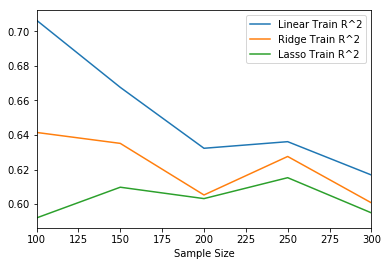

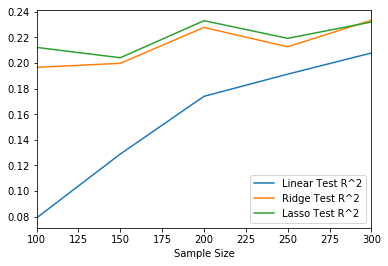

In [14]:
rep_rsq_df.plot(x = 'Sample Size', y = ['Linear Train R^2', 'Ridge Train R^2', 'Lasso Train R^2'])
rep_rsq_df.plot(x = 'Sample Size', y = ['Linear Test R^2', 'Ridge Test R^2', 'Lasso Test R^2'])

In [15]:
# above shows that lasso and ridge prevent overfittin pretty effectively

In [16]:
rep_ridge_std_ss_se = pd.Series(sample_sizes)

rep_linear_std_train_se = pd.Series(rep_linear_std_train)
rep_linear_std_test_se = pd.Series(rep_linear_std_test)
rep_ridge_std_train_se = pd.Series(rep_ridge_std_train)
rep_ridge_std_test_se = pd.Series(rep_ridge_std_test)
rep_lasso_std_train_se = pd.Series(rep_lasso_std_train)
rep_lasso_std_test_se = pd.Series(rep_lasso_std_test)

col_names2 = ['Sample Size', 'Linear Train St Dev', 'Linear Test St Dev', 
             'Ridge Train St Dev', 'Ridge Test St Dev', 'Lasso Train St Dev', 'Lasso Test St Dev']
rep_std_df = pd.DataFrame(columns = col_names2)

rep_std_df['Sample Size'] = rep_ridge_std_ss_se.values
rep_std_df['Linear Train St Dev'] = rep_linear_std_train_se.values
rep_std_df['Linear Test St Dev'] = rep_linear_std_test_se.values
rep_std_df['Ridge Train St Dev'] = rep_ridge_std_train_se.values
rep_std_df['Ridge Test St Dev'] = rep_ridge_std_test_se.values
rep_std_df['Lasso Train St Dev'] = rep_lasso_std_train_se.values
rep_std_df['Lasso Test St Dev'] = rep_lasso_std_test_se.values

rep_std_df

,Sample Size,Linear Train St Dev,Linear Test St Dev,Ridge Train St Dev,Ridge Test St Dev,Lasso Train St Dev,Lasso Test St Dev
0,100,0.055211,0.079081,0.088516,0.077506,0.092739,0.037802
1,150,0.054105,0.047947,0.062989,0.047438,0.090112,0.039635
2,200,0.039787,0.019831,0.054451,0.030256,0.047715,0.021884
3,250,0.036519,0.038962,0.041977,0.035202,0.046831,0.029776
4,300,0.022041,0.031819,0.026365,0.020594,0.028024,0.024428


In [17]:
rep_std_df.shape[1]

7

In [18]:
conf_int_df = rep_std_df.copy()
conf_int_df.applymap(str)

# rename columns
conf_int_df = conf_int_df.rename(index=str, columns={"Linear Train St Dev": "Linear Train Conf Int", "Linear Test St Dev": "Linear Test Conf Int", "Ridge Train St Dev" : "Ridge Train Conf Int", "Ridge Test St Dev" : "Ridge Test Conf Int", "Lasso Train St Dev" : "Lasso Train Conf Int", "Lasso Test St Dev" : "Lasso Test Conf Int"})


for i in range(rep_std_df.shape[0]):
    for j in range(1, rep_std_df.shape[1]):
        lower_bound = str(rep_rsq_df.iloc[i,j] - rep_std_df.iloc[i,j])
        upper_bound = str(rep_rsq_df.iloc[i,j] + rep_std_df.iloc[i,j])
        conf_int_df.iloc[i,j] = lower_bound + ',' + upper_bound
        
conf_int_df

,Sample Size,Linear Train Conf Int,Linear Test Conf Int,Ridge Train Conf Int,Ridge Test Conf Int,Lasso Train Conf Int,Lasso Test Conf Int
0,100,"0.65115988961,0.761580892357","-5.85229237325e-05,0.158102566716","0.552946893384,0.729978539628","0.119001633665,0.274013288588","0.499278835085,0.684757367224","0.174308367499,0.249913241943"
1,150,"0.613440773258,0.721651728369","0.080933491291,0.176828037549","0.572148041677,0.698126603897","0.15225129775,0.247127121775","0.519667628575,0.699890691102","0.164402230938,0.24367123846"
2,200,"0.592516090149,0.672089670556","0.154099081061,0.193761580691","0.550839657282,0.659741560262","0.197431139614,0.257943984048","0.555474558069,0.650905186191","0.211064348215,0.254832933958"
3,250,"0.599604727816,0.672642939304","0.152264616136,0.230187927344","0.58558552587,0.669540466626","0.177384350927,0.247788226707","0.568458774707,0.662121236134","0.189408123675,0.248959380463"
4,300,"0.594814547513,0.638896646561","0.175919049964,0.239557049076","0.574384148919,0.627114953435","0.212712398746,0.253900700521","0.566920235217,0.622967807795","0.207491213149,0.256347713225"


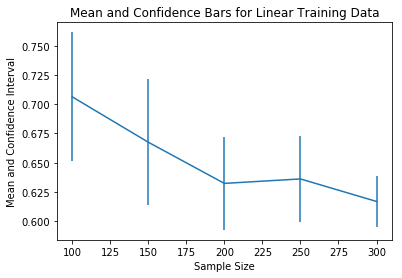

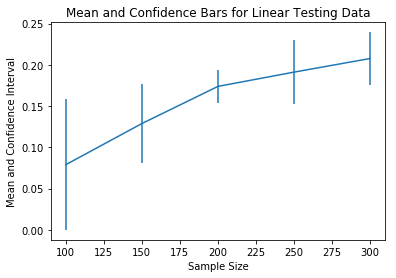

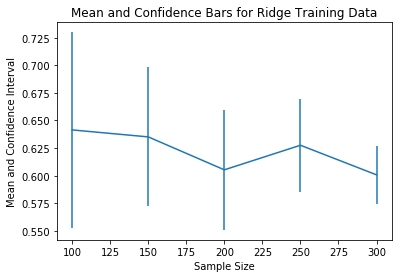

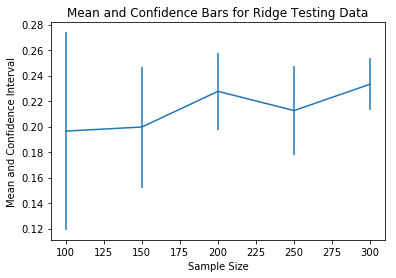

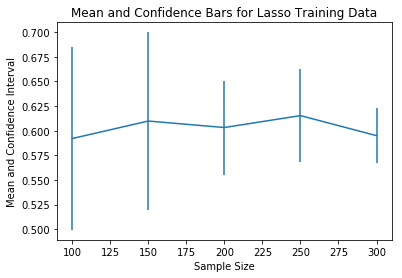

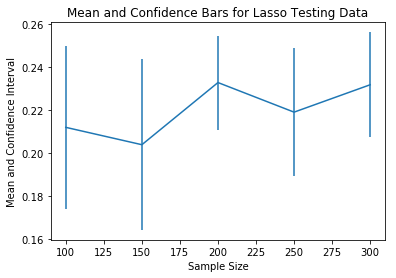

In [19]:
# get confidence interval values

sample_size = conf_int_df['Sample Size'].values

linear_train = conf_int_df['Linear Train Conf Int'].values
linear_test = conf_int_df['Linear Test Conf Int'].values
ridge_train = conf_int_df['Ridge Train Conf Int'].values
ridge_test = conf_int_df['Ridge Test Conf Int'].values
lasso_train = conf_int_df['Lasso Train Conf Int'].values
lasso_test = conf_int_df['Lasso Test Conf Int'].values

# formate confidence interval values appropriately
def split_comma(x):
    new_arr = np.zeros((2,5))
    for index, inter in enumerate(x):
        res = inter.split(',')
        new_arr[0][index] = res[0]
        new_arr[1][index] = res[1]
    return new_arr

linear_train_int = split_comma(linear_train)
linear_test_int = split_comma(linear_test)
ridge_train_int = split_comma(ridge_train)
ridge_test_int = split_comma(ridge_test)
lasso_train_int = split_comma(lasso_train)
lasso_test_int = split_comma(lasso_test)


# get appropriate mean r^2 values
linear_train_mean = rep_rsq_df['Linear Train R^2'].values
linear_test_mean = rep_rsq_df['Linear Test R^2'].values
lasso_train_mean = rep_rsq_df['Lasso Train R^2'].values
lasso_test_mean = rep_rsq_df['Lasso Test R^2'].values
ridge_train_mean = rep_rsq_df['Ridge Train R^2'].values
ridge_test_mean = rep_rsq_df['Ridge Test R^2'].values


def get_error(x, y):
    new_arr = np.zeros((2,5))
    for i in range(len(x)):
        for j in range(len(x[0])):
            new_arr[i][j] = abs(x[i][j] - y[j])
    return new_arr


#print(get_error(linear_train_int, linear_train_mean))
linear_train_err = get_error(linear_train_int, linear_train_mean)
linear_test_err = get_error(linear_test_int, linear_test_mean)
ridge_train_err = get_error(ridge_train_int, ridge_train_mean)
ridge_test_err = get_error(ridge_test_int, ridge_test_mean)
lasso_train_err = get_error(lasso_train_int, lasso_train_mean)
lasso_test_err = get_error(lasso_test_int, lasso_test_mean)


# PLOT OUR DATA
plt.figure(1)
plt.errorbar(sample_size, linear_train_mean, yerr=linear_train_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Linear Training Data")

plt.figure(2)
plt.errorbar(sample_size, linear_test_mean, yerr=linear_test_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Linear Testing Data")

plt.figure(3)
plt.errorbar(sample_size, ridge_train_mean, yerr=ridge_train_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Ridge Training Data")

plt.figure(4)
plt.errorbar(sample_size, ridge_test_mean, yerr=ridge_test_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Ridge Testing Data")

plt.figure(5)
plt.errorbar(sample_size, lasso_train_mean, yerr=lasso_train_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Lasso Training Data")

plt.figure(6)
plt.errorbar(sample_size, lasso_test_mean, yerr=lasso_test_err)
plt.ylabel("Mean and Confidence Interval")
plt.xlabel("Sample Size")
plt.title("Mean and Confidence Bars for Lasso Testing Data")

#### How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?



## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

### Additional Polynomial Terms (only)

In [20]:
train_data_poly = train_data.copy()
test_data_poly = test_data.copy()

train_data_poly['temp2'] = train_data_poly['temp']**2
train_data_poly['temp3'] = train_data_poly['temp']**3
train_data_poly['temp4'] = train_data_poly['temp']**4

train_data_poly['atemp2'] = train_data_poly['atemp']**2
train_data_poly['atemp3'] = train_data_poly['atemp']**3
train_data_poly['atemp4'] = train_data_poly['atemp']**4

train_data_poly['humidity2'] = train_data_poly['humidity']**2
train_data_poly['humidity3'] = train_data_poly['humidity']**3
train_data_poly['humidity4'] = train_data_poly['humidity']**4

train_data_poly['windspeed2'] = train_data_poly['windspeed']**2
train_data_poly['windspeed3'] = train_data_poly['windspeed']**3
train_data_poly['windspeed4'] = train_data_poly['windspeed']**4

# add 
test_data_poly['temp2'] = test_data_poly['temp']**2
test_data_poly['temp3'] = test_data_poly['temp']**3
test_data_poly['temp4'] = test_data_poly['temp']**4

test_data_poly['atemp2'] = test_data_poly['atemp']**2
test_data_poly['atemp3'] = test_data_poly['atemp']**3
test_data_poly['atemp4'] = test_data_poly['atemp']**4

test_data_poly['humidity2'] = test_data_poly['humidity']**2
test_data_poly['humidity3'] = test_data_poly['humidity']**3
test_data_poly['humidity4'] = test_data_poly['humidity']**4

test_data_poly['windspeed2'] = test_data_poly['windspeed']**2
test_data_poly['windspeed3'] = test_data_poly['windspeed']**3
test_data_poly['windspeed4'] = test_data_poly['windspeed']**4

In [21]:
X_train_poly = train_data_poly.loc[:, train_data_poly.columns != 'count']
Y_train_poly = train_data_poly['count']

X_test_poly = test_data_poly.loc[:, test_data_poly.columns != 'count']
Y_test_poly = test_data_poly['count']

In [22]:
# get test r^2 value
poly_regression = LinearRegression(fit_intercept = True)
poly_regression.fit(X_train_poly, Y_train_poly)

test_r2_poly = poly_regression.score(X_test_poly, Y_test_poly)

print("Additional Polynomial Terms (only) Test R^2: {}".format(test_r2_poly))

# generate summary which includes t-test
X_poly = sm.add_constant(X_train_poly)
regr_sm_poly = sm.OLS(Y_train_poly, X_poly)
multi_regr_model_poly = regr_sm_poly.fit()
pred_names = X_test_poly.loc[:, X_test_poly.columns != 'count'].columns.values
pred_names_new = np.insert(pred_names, 0, 'constant')
multi_regr_model_poly.summary(xname=list(pred_names_new))

Additional Polynomial Terms (only) Test R^2: 0.27275760476191846


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     15.13
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           7.98e-50
Time:                        23:07:44   Log-Likelihood:                -2790.9
No. Observations:                 331   AIC:                             5662.
Df Residuals:                     291   BIC:                             5814.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
constant         5429.9163    711.186      7.635      0.000      4030.197  6829.636
holiday          -526.2557    372.773     -1.412      0.159     -1259.929   207.418
workingday         14.7858    159.059      0.093      0.926      -298.265   327.837
temp              771.4866    760.117      1.015      0.311      -724.536  2267.510
atemp             897.2756    713.172      1.258      0.209      -506.353  2300.904
humidity         -668.9145    157.356     -4.251      0.000      -978.615  -359.214
windspeed        -446.5085    148.929     -2.998      0.003      -739.623  -153.394
season_1.0      -1523.2288    467.580     -3.258      0.001     -2443.496  -602.961
season_2.0       -756.7981    536.808     -1.410      0.160     -1813.316   299.720
season_3.0         55.5255    419.974      0.132      0.895      -771.046   882.097
month_1.0         555.6676    479.543      1.159      0.248      -388.146  1499.481
month_2.0         230.5990    478.558      0.482      0.630      -711.275  1172.473
month_3.0         250.8185    472.431      0.531      0.596      -678.997  1180.634
month_4.0         137.6431    605.236      0.227      0.820     -1053.552  1328.838
month_5.0        -481.5367    647.272     -0.744      0.458     -1755.466   792.392
month_6.0        -900.5181    648.671     -1.388      0.166     -2177.201   376.164
month_7.0        -861.3206    653.672     -1.318      0.189     -2147.844   425.203
month_8.0       -1160.2713    644.832     -1.799      0.073     -2429.397   108.854
month_9.0        -517.7332    527.018     -0.982      0.327     -1554.984   519.518
month_10.0       -370.2035    420.771     -0.880      0.380     -1198.343   457.936
month_11.0       -269.8653    380.406     -0.709      0.479     -1018.560   478.830
day_of_week_0.0  -471.0834    246.557     -1.911      0.057      -956.345    14.178
day_of_week_1.0  -227.9217    157.372     -1.448      0.149      -537.653    81.809
day_of_week_2.0  -268.0232    186.488     -1.437      0.152      -635.060    99.014
day_of_week_3.0    13.1360    196.966      0.067      0.947      -374.522   400.794
day_of_week_4.0  -104.0028    189.352     -0.549      0.583      -476.675   268.669
day_of_week_5.0    75.3419    184.193      0.409      0.683      -287.178   437.861
weather_1.0      1043.9997    546.051      1.912      0.057       -30.710  2118.709
weather_2.0      1103.0116    499.023      2.210      0.028       120.859  2085.164
temp2           -1811.0180    816.910     -2.217      0.027     -3418.820  -203.216
temp3               8.6078    275.731      0.031      0.975      -534.071   551.287
temp4             -45.1910    171.419     -0.264      0.792      -382.570   292.188
atemp2           1175.5005    788.864      1.490      0.137      -377.102  2728.103
atemp3           -303.9358    246.097     -1.235      0.218

In [23]:
multi_regr_model_poly.pvalues[multi_regr_model_poly.pvalues < 0.05]

const          3.262138e-13
humidity       2.870343e-05
windspeed      2.950904e-03
season_1.0     1.256241e-03
weather_2.0    2.785951e-02
temp2          2.740200e-02
dtype: float64

#### Analysis for Additional Polynomial Terms (only)

The test R^2 for this expanded model is 0.273, which is ** better ** than the test R^2 from part(b) of HW 3, 0.258. We view this improvement as significant in showing that our new polynomial terms improves the predictive ability of our model. This improvement makes sense because polynomial terms allows us to fit curves (nonlinear relationships) in our data set more accurately than a purely linear model.

The estimated coefficients for the terms corresponding to ** humidity (1st power), windspeed (1st power), season_1.0 (spring), weather_2.0 (cloudy), and temp2 (2nd power) ** were statistically significant at a significance level of 5%. The coefficients for day_of_week_0.0 (Sunday) and weather_1.0 (cloudy) came close with p-values of 0.057.

### Additional Interaction Terms (only)

In [24]:


train_data_inter = train_data.copy()
test_data_inter = test_data.copy()

X_train_inter = train_data_inter.loc[:, train_data_inter.columns != 'count']
Y_train_inter = train_data_inter['count']

X_test_inter = test_data_inter.loc[:, test_data_inter.columns != 'count']
Y_test_inter = test_data_inter['count']

# for training data
X_train_inter['month_12.0'] = 1 - (X_train_inter['month_1.0'] + X_train_inter['month_2.0'] + 
                                   X_train_inter['month_3.0'] + X_train_inter['month_4.0'] + 
                                   X_train_inter['month_5.0'] + X_train_inter['month_6.0'] + 
                                   X_train_inter['month_7.0'] + X_train_inter['month_8.0'] + 
                                   X_train_inter['month_9.0'] + X_train_inter['month_10.0'] + 
                                   X_train_inter['month_11.0'])               

X_train_inter['month_12.0 temp'] = X_train_inter['month_12.0'] * X_train_inter['temp']
X_train_inter['workingday weather_1.0'] = X_train_inter['workingday'] * X_train_inter['weather_1.0']

X_train_inter = X_train_inter.loc[:, X_train_inter.columns != 'month_12.0']

# for test data
X_test_inter['month_12.0'] = 1 - (X_test_inter['month_1.0'] + X_test_inter['month_2.0'] + 
                                  X_test_inter['month_3.0'] + X_test_inter['month_4.0'] +
                                  X_test_inter['month_5.0'] + X_test_inter['month_6.0'] +
                                  X_test_inter['month_7.0'] + X_test_inter['month_8.0'] +
                                  X_test_inter['month_9.0'] + X_test_inter['month_10.0'] +
                                  X_test_inter['month_11.0'])  

X_test_inter['month_12.0 temp'] = X_test_inter['month_12.0'] * X_test_inter['temp']
X_test_inter['workingday weather_1.0'] = X_test_inter['workingday'] * X_test_inter['weather_1.0']

X_test_inter = X_test_inter.loc[:, X_test_inter.columns != 'month_12.0']

In [25]:
# get test r^2 value
inter_regression = LinearRegression(fit_intercept = True)
inter_regression.fit(X_train_inter, Y_train_inter)

test_r2_inter = inter_regression.score(X_test_inter, Y_test_inter)

print("Additional Interaction Terms (only) Test R^2: {}".format(test_r2_inter))

# generate summary which includes t-test
X_inter = sm.add_constant(X_train_inter)
regr_sm_inter = sm.OLS(Y_train_inter, X_inter)
multi_regr_model_inter = regr_sm_inter.fit()
pred_names = X_test_inter.loc[:, X_test_inter.columns != 'count'].columns.values
pred_names_new = np.insert(pred_names, 0, 'constant')
multi_regr_model_inter.summary(xname=list(pred_names_new))

Additional Interaction Terms (only) Test R^2: 0.28120865835372255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           2.43e-41
Time:                        23:07:44   Log-Likelihood:                -2830.5
No. Observations:                 331   AIC:                             5721.
Df Residuals:                     301   BIC:                             5835.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
constant                4734.0152    918.011      5.157      0.000      2927.483  6540.547
holiday                 -571.0206    406.951     -1.403      0.162     -1371.851   229.809
workingday              -199.3469    265.959     -0.750      0.454      -722.720   324.027
temp                     906.9589    475.169      1.909      0.057       -28.114  1842.032
atemp                    274.7706    429.787      0.639      0.523      -570.997  1120.538
humidity                -574.1179    113.992     -5.036      0.000      -798.441  -349.795
windspeed               -275.7457     81.737     -3.374      0.001      -436.593  -114.898
season_1.0              -884.3187    550.763     -1.606      0.109     -1968.152   199.515
season_2.0              -110.9431    587.150     -0.189      0.850     -1266.381  1044.495
season_3.0               -75.5976    453.682     -0.167      0.868      -968.388   817.193
month_1.0              -1211.6733   1040.400     -1.165      0.245     -3259.052   835.706
month_2.0              -1095.9921   1020.067     -1.074      0.283     -3103.357   911.373
month_3.0               -896.4352    975.450     -0.919      0.359     -2816.000  1023.129
month_4.0               -705.5649    997.870     -0.707      0.480     -2669.249  1258.119
month_5.0              -1011.9024   1004.051     -1.008      0.314     -2987.750   963.945
month_6.0              -1737.2977    980.173     -1.772      0.077     -3666.157   191.562
month_7.0              -2140.0440    941.775     -2.272      0.024     -3993.341  -286.747
month_8.0              -1640.2677    934.999     -1.754      0.080     -3480.230   199.695
month_9.0               -421.5095    838.850     -0.502      0.616     -2072.263  1229.244
month_10.0              -290.2825    766.708     -0.379      0.705     -1799.069  1218.504
month_11.0              -681.9367    777.020     -0.878      0.381     -2211.016   847.142
day_of_week_0.0         -423.1840    269.763     -1.569      0.118      -954.044   107.676
day_of_week_1.0         -272.5310    174.283     -1.564      0.119      -615.499    70.437
day_of_week_2.0         -357.2100    206.132     -1.733      0.084      -762.851    48.431
day_of_week_3.0           -7.7484    217.339     -0.036      0.972      -435.446   419.949
day_of_week_4.0          -89.8205    211.342     -0.425      0.671      -505.716   326.075
day_of_week_5.0          -43.0576    203.513     -0.212      0.833      -443.546   357.431
weather_1.0             1339.9147    590.803      2.268      0.024       177.287  2502.542
weather_2.0             1563.2213    477.700      3.272      0.001       623.167  2503.275
month_12.0 temp         1045.1338    729.703      1.432      0.153      -390.832  2481.099
workingday weather_1.0   313.2194    352.789      0.888      0.375      -381.025

In [26]:
multi_regr_model_inter.pvalues[multi_regr_model_inter.pvalues < 0.05]

const          4.561254e-07
humidity       8.186394e-07
windspeed      8.390803e-04
month_7.0      2.377039e-02
weather_1.0    2.404045e-02
weather_2.0    1.190482e-03
dtype: float64

#### Analysis for Additional Interaction Terms (only)

The test R^2 for this expanded model is 0.281, which is ** better ** than the test R^2 from part(b) of HW 3, 0.258, and also better than the test R^2 from the model with additional polynomial terms from above, 0.273. This result shows us the power of adding interaction terms that make sense intuitively. In this case, cold temperatures during December likely explains the lack of rides very well. Similarly, a warm, clear work day likely explains an increase in rides because more people are biking to work using the bikeshare service.

The estimated coefficients for the terms corresponding to ** humidity (1st power), windspeed (1st power), month_7.0 (July), weather_1.0 (clear), and weather_2.0 (cloudy) ** were statistically significant at a significance level of 5%. 

Surprisingly, our two new interaction terms were not statistically significant, with rather high p-values of 0.15 and 0.38. We hypothesize that adding these terms has also improved the effect that the original predictors (month_12.0, temp, workingday, weather1.0) had on the model. This hypothesis is supported by the fact that weather_1.0 is now a statistically significant predictor (whereas before it was not). Overall, however, the addition of these interaction terms has clearly improved the test R^2.

### Additional Polynomial Terms AND Additional Interaction Terms

In [27]:

# m12_temp_inter_tr_terms = m12_temp_inter_tr.fit_transform(X_train_inter[['month_12.0', 'temp']])
# work_day_weather_1_interaction = PolynomialFeatures(interaction_only=True)
# work_day_weather_1_interaction_terms = work_day_weather_1_interaction.fit_transform(X_train_inter[['workingday', 'weather_1.0']])
# X_train_with_i1 = np.hstack((X_train_inter, m12_temp_inter_tr_terms))
# X_train_with_int = np.hstack((X_train_with_i1, work_day_weather_1_interaction_terms))

X_train_both = X_train_poly.copy()
Y_train_both = Y_train_poly.copy()

X_test_both = X_test_poly.copy()
Y_test_both = Y_test_poly.copy()

# for training data
X_train_both['month_12.0'] = 1 - (X_train_both['month_1.0'] + X_train_both['month_2.0'] + 
                                   X_train_both['month_3.0'] + X_train_both['month_4.0'] + 
                                   X_train_both['month_5.0'] + X_train_both['month_6.0'] + 
                                   X_train_both['month_7.0'] + X_train_both['month_8.0'] + 
                                   X_train_both['month_9.0'] + X_train_both['month_10.0'] + 
                                   X_train_both['month_11.0'])               

X_train_both['month_12.0 temp'] = X_train_both['month_12.0'] * X_train_both['temp']
X_train_both['workingday weather_1.0'] = X_train_both['workingday'] * X_train_both['weather_1.0']

X_train_both = X_train_both.loc[:, X_train_both.columns != 'month_12.0']

# for test data
X_test_both['month_12.0'] = 1 - (X_test_both['month_1.0'] + X_test_both['month_2.0'] + 
                                  X_test_both['month_3.0'] + X_test_both['month_4.0'] +
                                  X_test_both['month_5.0'] + X_test_both['month_6.0'] +
                                  X_test_both['month_7.0'] + X_test_both['month_8.0'] +
                                  X_test_both['month_9.0'] + X_test_both['month_10.0'] +
                                  X_test_both['month_11.0'])  

X_test_both['month_12.0 temp'] = X_test_both['month_12.0'] * X_test_both['temp']
X_test_both['workingday weather_1.0'] = X_test_both['workingday'] * X_test_both['weather_1.0']

X_test_both = X_test_both.loc[:, X_test_both.columns != 'month_12.0']

In [28]:
# get test r^2 value
both_regression = LinearRegression(fit_intercept = True)
both_regression.fit(X_train_both, Y_train_both)

test_r2_both = both_regression.score(X_test_both, Y_test_both)

print("Additional Poly & Interaction Terms Test R^2: {}".format(test_r2_both))

# generate summary which includes t-test
X_both = sm.add_constant(X_train_both)
regr_sm_both = sm.OLS(Y_train_both, X_both)
multi_regr_model_both = regr_sm_both.fit()
pred_names = X_test_both.loc[:, X_test_both.columns != 'count'].columns.values
pred_names_new = np.insert(pred_names, 0, 'constant')
multi_regr_model_both.summary(xname=list(pred_names_new))

Additional Poly & Interaction Terms Test R^2: 0.2988931780483174


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.31
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           1.07e-48
Time:                        23:07:44   Log-Likelihood:                -2790.7
No. Observations:                 331   AIC:                             5665.
Df Residuals:                     289   BIC:                             5825.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
constant                5554.5207    948.560      5.856      0.000      3687.559  7421.482
holiday                 -504.8692    376.774     -1.340      0.181     -1246.437   236.699
workingday               -78.3221    242.127     -0.323      0.747      -554.878   398.234
temp                     795.0787    764.545      1.040      0.299      -709.704  2299.861
atemp                    881.7153    717.029      1.230      0.220      -529.546  2292.976
humidity                -676.3519    158.504     -4.267      0.000      -988.320  -364.384
windspeed               -447.0797    150.175     -2.977      0.003      -742.655  -151.505
season_1.0             -1493.1626    505.353     -2.955      0.003     -2487.801  -498.524
season_2.0              -729.5247    549.124     -1.329      0.185     -1810.315   351.266
season_3.0                71.1170    422.825      0.168      0.867      -761.090   903.324
month_1.0                480.9222   1027.332      0.468      0.640     -1541.080  2502.924
month_2.0                155.1827    971.669      0.160      0.873     -1757.263  2067.629
month_3.0                169.1863    914.744      0.185      0.853     -1631.218  1969.591
month_4.0                 51.3399    927.881      0.055      0.956     -1774.921  1877.601
month_5.0               -543.9373    952.226     -0.571      0.568     -2418.114  1330.240
month_6.0               -985.7320    950.971     -1.037      0.301     -2857.440   885.976
month_7.0               -946.7517    923.097     -1.026      0.306     -2763.598   870.094
month_8.0              -1239.7154    915.527     -1.354      0.177     -3041.662   562.231
month_9.0               -574.9871    808.551     -0.711      0.478     -2166.382  1016.408
month_10.0              -401.3115    735.007     -0.546      0.585     -1847.957  1045.334
month_11.0              -292.6911    739.539     -0.396      0.693     -1748.256  1162.874
day_of_week_0.0         -462.4486    248.640     -1.860      0.064      -951.824    26.926
day_of_week_1.0         -239.5854    159.457     -1.503      0.134      -553.429    74.259
day_of_week_2.0         -280.3233    188.566     -1.487      0.138      -651.459    90.813
day_of_week_3.0           -3.0325    200.247     -0.015      0.988      -397.160   391.095
day_of_week_4.0         -119.9933    192.772     -0.622      0.534      -499.408   259.422
day_of_week_5.0           59.7432    187.628      0.318      0.750      -309.547   429.033
weather_1.0              923.0406    594.656      1.552      0.122      -247.366  2093.447
weather_2.0             1104.9141    502.004      2.201      0.029       116.866  2092.962
temp2                  -1801.8581    819.867     -2.198      0.029     -3415.526  -188.190
temp3                      1.6628    278.742      0.006      0.995      -546.958

In [29]:
multi_regr_model_both.pvalues[multi_regr_model_both.pvalues < 0.05]

const          1.289019e-08
humidity       2.687093e-05
windspeed      3.156613e-03
season_1.0     3.387359e-03
weather_2.0    2.852628e-02
temp2          2.876055e-02
dtype: float64

#### Analysis for Additional Polynomial Terms & Additional Interaction Terms

The test R^2 for this expanded model is 0.299, which is ** better ** than the test R^2 from part(b) of HW 3, 0.258, and also better both test R^2's from the models directly above. This result confirms that the two additions to the model (polynomial terms for the continuous variables and 2 new interaction terms) both substantially increase its predictive ability.

The estimated coefficients for the terms corresponding to ** humidity (1st power), windspeed (1st power), season_1.0 (spring), weather_2.0 (cloudy), and temp2 (2nd power) ** were statistically significant at a significance level of 5%. 

Once again, our two new interaction terms were not statistically significant, with high p-values of 0.95 and 0.61. These terms seem to have lost significance after the polynomial terms were added (compared with the model directly above this one). See above for analysis of the model in which we add the interaction terms separate of the polynomial terms.

## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

In adding the interaction terms, we first recognize that we don't need to take binary terms to any powers because $0^2 = 0$ and $1^2 is 1$, as they are for higher powers as well. Thus, we only raise the continuous predictors to higher powers, as we did in part(g).

#### Methodology

First, we created lists for each of the continuous predictors and their powers (4 lists in total) and a big list of all the categorical predictors that we one-hotted and made into binary predictors. We used these lists to separate our main dataframe into a dataframe of just the binary predictors, and did a PolynomialFeatures, interaction only fit_transform on this subsetted dataframe. This operation gave us 24-choose-2 ($24*23/2 = 276$) new predictors.

We then went through each of the four lists of continuous predictors, and multiplied them with all other continuous predictors we hadn't multiplied them with before, as well as all binary predictors. In other words, once we multipled $temp$ by $atemp$, we made sure not to multiply $atemp$ by $temp$ so as not to overcount. These operations gave us $4*36+4*32+4*28+4*24 = 480$ new predictors.

** These $276$ and $480$ new predictors, added to the original $40$ predictors, gives us a total of $796$ predictors. ** 

We realize that we have not accounted for the fact that some columns might be all 0's (since we multipled combinations like  month_1.0 by month_2.0, which are never 1 at the same time and thus produce a column of 0's). However, we reason that these 0's columns should not impact the regression for this very fact that they are all 0's, and multiplying a term by 0 will nullify it's impact on predictions.

In [30]:
X_train_pca = X_train_poly.copy()
Y_train_pca = Y_train_poly.copy()

X_test_pca = X_test_poly.copy()
Y_test_pca = Y_test_poly.copy()

In [31]:
temp_list = ['temp', 'temp2', 'temp3', 'temp4']
atemp_list = ['atemp', 'atemp2', 'atemp3', 'atemp4']
humidity_list = ['humidity', 'humidity2', 'humidity3', 'humidity4']
windspeed_list = ['windspeed', 'windspeed2', 'windspeed3', 'windspeed4']
bin_list = list(X_train_pca.columns.values)[:2] + list(X_train_pca.columns.values)[6:28]

In [32]:
X_train_temp = X_train_pca[temp_list]
X_train_atemp = X_train_pca[atemp_list]
X_train_humidity = X_train_pca[humidity_list]
X_train_windspeed = X_train_pca[windspeed_list]
X_train_bin = X_train_pca[bin_list]

X_test_temp = X_test_pca[temp_list]
X_test_atemp = X_test_pca[atemp_list]
X_test_humidity = X_test_pca[humidity_list]
X_test_windspeed = X_test_pca[windspeed_list]
X_test_bin = X_test_pca[bin_list]

In [33]:
interaction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
interaction_terms = interaction.fit_transform(X_train_bin)

X_train_pca2 = pd.DataFrame(interaction_terms)
X_train_pca2.head()

X_train_pca3 = pd.concat([X_train_pca2, X_train_temp, X_train_atemp, 
                          X_train_humidity, X_train_windspeed], axis=1, join_axes=[X_train_pca2.index])

interaction2 = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
interaction_terms2 = interaction2.fit_transform(X_test_bin)

X_test_pca2 = pd.DataFrame(interaction_terms2)
X_test_pca2.head()

X_test_pca3 = pd.concat([X_test_pca2, X_test_temp, X_test_atemp, 
                          X_test_humidity, X_test_windspeed], axis=1, join_axes=[X_test_pca2.index])

In [34]:
grouped_list_1 = bin_list + atemp_list + humidity_list + windspeed_list
grouped_list_2 = bin_list + humidity_list + windspeed_list
grouped_list_3 = bin_list + windspeed_list

In [35]:
for temp in temp_list:
    for item in grouped_list_1:
        X_train_pca3[temp + item] = X_train_temp[temp] * X_train_pca[item]
        mean = X_train_pca3[temp + item].mean()
        sd = X_train_pca3[temp + item].std()
        X_train_pca3[temp + item] = (X_train_pca3[temp + item] - mean) / sd
        
for atemp in atemp_list:
    for item2 in grouped_list_2:
        X_train_pca3[atemp + item2] = X_train_atemp[atemp] * X_train_pca[item2]
        mean = X_train_pca3[atemp + item2].mean()
        sd = X_train_pca3[atemp + item2].std()
        X_train_pca3[atemp + item2] = (X_train_pca3[atemp + item2] - mean) / sd
        
for humidity in humidity_list:
    for item3 in grouped_list_3:
        X_train_pca3[humidity + item3] = X_train_humidity[humidity] * X_train_pca[item3]
        mean = X_train_pca3[humidity + item3].mean()
        sd = X_train_pca3[humidity + item3].std()
        X_train_pca3[humidity + item3] = (X_train_pca3[humidity + item3] - mean) / sd
        
for windspeed in windspeed_list:
    for item4 in bin_list:
        X_train_pca3[windspeed + item4] = X_train_windspeed[windspeed] * X_train_pca[item4]
        mean = X_train_pca3[windspeed + item4].mean()
        sd = X_train_pca3[windspeed + item4].std()
        X_train_pca3[windspeed + item4] = (X_train_pca3[windspeed + item4] - mean) / sd

# print(X_train_pca3.shape)
# inter_names = list(X_test_pca3[:,:316])
                   #.columns.values
# print(len(inter_names))
# for i in ['temp', 'atemp', 'humidity', 'windspeed']:
    
X_train_pca3.describe()

,0,1,2,3,4,5,6,7,8,9,...,windspeed4month_10.0,windspeed4month_11.0,windspeed4day_of_week_0.0,windspeed4day_of_week_1.0,windspeed4day_of_week_2.0,windspeed4day_of_week_3.0,windspeed4day_of_week_4.0,windspeed4day_of_week_5.0,windspeed4weather_1.0,windspeed4weather_2.0
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,...,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02
mean,0.033233,0.670695,0.217523,0.259819,0.265861,0.078550,0.066465,0.075529,0.078550,0.102719,...,3.152899e-17,-1.276253e-16,1.304764e-16,2.549153e-17,5.970384e-17,-6.230330e-17,-1.133702e-16,1.931151e-16,-8.989117e-17,3.595647e-16
std,0.179515,0.470672,0.413186,0.439199,0.442459,0.269442,0.249471,0.264643,0.269442,0.304051,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.446686e-01,-1.411141e-01,-1.285487e-01,-1.341264e-01,-1.556308e-01,-1.707624e-01,-1.352397e-01,-1.210952e-01,-2.341945e-01,-2.120063e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.446686e-01,-1.411141e-01,-1.285487e-01,-1.341264e-01,-1.556308e-01,-1.707624e-01,-1.352397e-01,-1.210952e-01,-2.341945e-01,-2.120063e-01
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.446686e-01,-1.411141e-01,-1.285487e-01,-1.341264e-01,-1.556308e-01,-1.707624e-01,-1.352397e-01,-1.210952e-01,-2.334611e-01,-2.120063e-01
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.446686e-01,-1.411141e-01,-1.285487e-01,-1.341264e-01,-1.556308e-01,-1.707624e-01,-1.352397e-01,-1.210952e-01,-1.772616e-01,-2.058362e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.406992e+01,1.099070e+01,1.626381e+01,1.518684e+01,1.212031e+01,1.114297e+01,1.563538e+01,1.589538e+01,9.744872e+00,1.259210e+01


In [36]:
for temp in temp_list:
    for item in grouped_list_1:
        X_test_pca3[temp + item] = X_test_temp[temp] * X_test_pca[item]
        mean = X_test_pca3[temp + item].mean()
        sd = X_test_pca3[temp + item].std()
        X_test_pca3[temp + item] = (X_test_pca3[temp + item] - mean) / sd
        
for atemp in atemp_list:
    for item2 in grouped_list_2:
        X_test_pca3[atemp + item2] = X_test_atemp[atemp] * X_test_pca[item2]
        mean = X_test_pca3[atemp + item2].mean()
        sd = X_test_pca3[atemp + item2].std()
        X_test_pca3[atemp + item2] = (X_test_pca3[atemp + item2] - mean) / sd
        
for humidity in humidity_list:
    for item3 in grouped_list_3:
        X_test_pca3[humidity + item3] = X_test_humidity[humidity] * X_test_pca[item3]
        mean = X_test_pca3[humidity + item3].mean()
        sd = X_test_pca3[humidity + item3].std()
        X_test_pca3[humidity + item3] = (X_test_pca3[humidity + item3] - mean) / sd
        
for windspeed in windspeed_list:
    for item4 in bin_list:
        X_test_pca3[windspeed + item4] = X_test_windspeed[windspeed] * X_test_pca[item4]
        mean = X_test_pca3[windspeed + item4].mean()
        sd = X_test_pca3[windspeed + item4].std()
        X_test_pca3[windspeed + item4] = (X_test_pca3[windspeed + item4] - mean) / sd

X_test_pca3.head()

,0,1,2,3,4,5,6,7,8,9,...,windspeed4month_10.0,windspeed4month_11.0,windspeed4day_of_week_0.0,windspeed4day_of_week_1.0,windspeed4day_of_week_2.0,windspeed4day_of_week_3.0,windspeed4day_of_week_4.0,windspeed4day_of_week_5.0,windspeed4weather_1.0,windspeed4weather_2.0
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.102533,-0.143391,-0.108765,-0.150851,-0.14973,-0.114296,-0.107361,-0.116226,-0.168593,-0.183040
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.102533,-0.143391,-0.108765,-0.150851,-0.14973,-0.114296,2.492041,-0.116226,-0.168593,5.084744
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.102533,-0.143391,-0.108765,-0.150851,-0.14973,-0.114296,-0.096866,-0.116226,-0.168593,-0.161770
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.102533,-0.143391,-0.108765,0.206766,-0.14973,-0.114296,-0.107362,-0.116226,-0.107722,-0.183040
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.102533,-0.143391,-0.105176,-0.150851,-0.14973,-0.114296,-0.107362,-0.116226,-0.167948,-0.183040


In [37]:
from sklearn.decomposition import PCA

print(X_train_pca3.shape)

# justify

for i in range(1,6):
    pca = PCA(n_components = i)
    pca.fit(X_train_pca3)
    X_train_post_pca = pca.transform(X_train_pca3)
    X_test_post_pca = pca.transform(X_test_pca3)

    print()
    print('Explained variance ratio for {} components:'.format(i), pca.explained_variance_ratio_)

    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_post_pca, Y_train_pca)

    pred_names = X_test_pca.loc[:, X_test_pca.columns != 'count'].columns.values
    
    print('Train R^2: {}'.format(regression_model.score(X_train_post_pca, Y_train_pca)))
    print('Test R^2: {}'.format(regression_model.score(X_test_post_pca, Y_test_pca)))

(331, 796)

Explained variance ratio for 1 components: [ 0.20527861]
Train R^2: 0.1273598263755813
Test R^2: -0.015635409458741645

Explained variance ratio for 2 components: [ 0.20527861  0.12393502]
Train R^2: 0.1820810151307526
Test R^2: 0.11958412471606072

Explained variance ratio for 3 components: [ 0.20527861  0.12393502  0.08085253]
Train R^2: 0.2028020552853903
Test R^2: 0.07790292308662605

Explained variance ratio for 4 components: [ 0.20527861  0.12393502  0.08085253  0.0490514 ]
Train R^2: 0.2752671019759585
Test R^2: 0.1827663959454905

Explained variance ratio for 5 components: [ 0.20527861  0.12393502  0.08085253  0.0490514   0.03482546]
Train R^2: 0.3103400118788242
Test R^2: 0.1914511724095143


In [38]:
X_train_post_pca = pca.transform(X_train_pca3)

X_pca = sm.add_constant(X_train_post_pca)
regr_sm_pca = sm.OLS(Y_train_pca, X_pca)
multi_regr_model_pca = regr_sm_pca.fit()
# pred_names = X_test_pca.loc[:, X_test_pca.columns != 'count'].columns.values
# pred_names_new = np.insert(pred_names, 0, 'constant')
# print(len(pred_names_new))
multi_regr_model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     29.25
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           1.67e-24
Time:                        23:07:47   Log-Likelihood:                -2912.7
No. Observations:                 331   AIC:                             5837.
Df Residuals:                     325   BIC:                             5860.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4598.4471     89.017     51.658      0.000      4423.325  4773.569
x1           -57.7007      7.448     -7.747      0.000       -72.353   -43.048
x2           -48.6763      9.586     -5.078      0.000       -67.534   -29.819
x3           -37.0848     11.868     -3.125      0.002       -60.432   -13.738
x4            89.0397     15.237      5.844      0.000        59.065   119.014
x5           -73.5119     18.083     -4.065      0.000      -109.086   -37.938
==============================================================================
Omnibus:                        8.625   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                5.853
Skew:                           0.185   Prob(JB):                       0.0536
Kurtosis:                       2.464   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What are the dimensions of this 'design matrix' of all the predictor variables?  

It is 331x796, so there are 331 observations and 796 predictors. 

#### What are the issues with attempting to fit a regression model using all of these predictors?

If we try to fit a regression model with almost 800 predictors, we lose almost all transparency on our model. With so many predictors and coefficients, our regression becomes much more like a black box, where we have no possible way of understanding all of the coefficients, and why factors are predictive. Additionally, with so many binary variables that contain many 0's, we get lots of interaction terms that are mostly 0 and add very little to the predictive model. 

#### Create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

Each time that we add another PCA vector to the model, the training r2 value improves. This makes sense intuitively. Each PCA vector captures certain features in the training data, and the first vector describes the most variance, the second vector describes the next most variance, and so on. Therefore, each time we add a new PCA vector to the model, we fit more completely to the training data, and get a better fit in terms of the r2 value. 

#### Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  

Based on the values that we see for r2 of the test data, I would say the model with all first 5 PCA vectors included is the best to predict the sample, since it has the highest test r2, at 0.197. As stated above, more PCA vectors means a more complete fit of the training data, and this clearly has a positive outcome on the ability to predict on test data. I would also do more testing to try models with more than 5 PCA vectors included, because after a bit of testing, it seems that the test r2 continues to rise past the first 5 vectors, so there may be a more optimal model, although I would want to test collinearity as well to make sure we don't select redundant predictors.  

#### What are the interpretations of this model's coefficients?

In PCA, we input our original predictors (in this case, 796 of them), and we get an output of a set of orthogonal vectors that captures trends and features of the data. Specifically, these Z vectors represent linear combinations of predictors. In other words, we assign a coefficient to each predictor to generate a set that models the data well, and captures the predictive significance of each selected predictor. So, the coefficients that our linear model generates when training this data rely on these coefficients that have already been assigned by PCA. In our OLS summary, we see these coefficients for each of our 5 PCA vectors. They are -57, -48, -37, +89, and -73. Although it is difficult to interpret the coefficients that PCA assigns for each predictor in each of the 5 vectors, we know that the linear combinations created by vectors 1, 2, 3, and 5 contibute negatively to the count variable, and vector 4 contributes positively (although this alone does not tell us much since the real information lies within the PCA vectors). All of these PCA vectors are statistically significant predictors at under 5%.

## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [39]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

In [40]:
import copy
def backward_select(x, y, initial_predictors): # x is dataframe (columns predictors), y is counts
    # Makes use of code for exhaustive selection from section notes
    d = x.shape[1]
    # ms holds the best model with different numbers of predictors
    ms = [initial_predictors]

    # find best set of predictors for each value up to #predictors
    for k in range(1,d):
        min_rmsle = 10000
        min_temp_model = []
        model = ms[k-1]
        if len(model) > 1:
        
            # get predictors that are not in temp_model
            for index, pred in enumerate(model):
                temp_model = copy.deepcopy(model)
                # remove one predictor from previous model on each iteration
                temp_model = np.delete(temp_model, index)
                # fit Linear Regression model
                multi_regression_model = LinearRegression(fit_intercept=True)
                multi_regression_model.fit(x[list(temp_model)], y)
                train_pred = multi_regression_model.predict(x[list(temp_model)])
                rmsle_val = rmsle(y, train_pred)
                # save information about min value
                if rmsle_val < min_rmsle:
                    min_rmsle = rmsle_val
                    min_temp_model = temp_model
            ms.append(min_temp_model)
        
    # iterate through models of different sizes, pick lowest BIC
    overall_min_rmsle = 10000
    overall_min_model = ms[0]
    for m in ms:
        if m != []:
            # fit the model and determine the minimum
            multi_regression_model = LinearRegression(fit_intercept=True)
            multi_regression_model.fit(x[m], y)
            train_pred = multi_regression_model.predict(x[m])
            rmsle_val = rmsle(y, train_pred)
            if rmsle_val < overall_min_rmsle:
                overall_min_rmsle = rmsle_val
                overall_min_model = m
    
    # returns list of predictors corresponding to best model        
    return overall_min_model, overall_min_rmsle

In [41]:
# organize data
X_train_i = train_data_poly.loc[:, train_data.columns != 'count']
Y_train_i = train_data_poly['count']

X_test_i = test_data_poly.loc[:, test_data.columns != 'count']
Y_test_i = test_data_poly['count']

# TRAIN MODEL, get original RMSLE measures
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train_i, Y_train_i)

train_pred = multi_regression_model.predict(X_train_i)
test_pred = multi_regression_model.predict(X_test_i)

rmsle_train = rmsle(Y_train_i, train_pred)
rmsle_test = rmsle(Y_test_i, test_pred)

print("RMSLE on training data: ", rmsle_train)
print("RMSLE on testing data: ", rmsle_test)
print()

# TRAIN A MODEL MINIMIZING RMSLE
# use backward selection from hw3
pred_names = X_train_i.loc[:, X_train_i.columns != 'count'].columns.values
preds, rmsle_val = backward_select(X_train_i, Y_train_i, pred_names)
print("PREDICTORS CHOSEN BY BACKWARD SELECTION WITH RMSLE: \n", preds)
print()
print("Number of predictors: ", len(preds))
print()
print("Training RMSLE for this model: ", rmsle_val)

# fit a regression, get test r2
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train_i[preds], Y_train_i)
test_pred = multi_regression_model.predict(X_test_i[preds])
rmsle_test = rmsle(Y_test_i, test_pred)

print("Test RMSLE for this model: ", rmsle_test)

/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log


RMSLE on training data:  0.343677399236
RMSLE on testing data:  0.538492008421

PREDICTORS CHOSEN BY BACKWARD SELECTION WITH RMSLE: 
 ['holiday' 'temp' 'humidity' 'windspeed' 'season_1.0' 'season_3.0'
 'month_2.0' 'month_3.0' 'month_6.0' 'month_7.0' 'month_8.0' 'month_9.0'
 'month_10.0' 'month_11.0' 'day_of_week_0.0' 'day_of_week_5.0'
 'weather_1.0' 'weather_2.0']

Number of predictors:  18

Training RMSLE for this model:  0.33898572559
Test RMSLE for this model:  0.537777311105


/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:35: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


#### Give a justification for your proposed approach. 

Here, I used backwards selection to select my model. As seen in HW3, as well as labs and lectures, using backward (or forward) selection is a very good way to reduce an excessive number of predictors to a simpler set that avoids overfitting and collinearity. Although it will not always return the absolute optimal set of predictors like exhaustive selection, it is much more computationally reasonable and still returns a very good set of predictors. By altering our backward selection code from HW3 to use RMSLE as the selection criteria rather than BIC, this model is guaranteed to perform well for RMSLE tests. I think this approach is a good balance between ensuring performance with RMSLE and avoiding an unneccessary extraordinary amount of computation.

#### Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? 

As we can see, the training RMSLE for the polynomial model from part g is .343677. The model selected through RMSLE backwards selection yields a lower RMSLE, at .33898, and cuts down the number of predictors to 18. The backwards selection process only selects a new model if it improves the RMSLE measurement, so this makes sense.

#### How about the test RMSLE of the new model? 

Like the training RMSLE, the test RMSLE also decreases very slightly from .51616 for the model from part g to .51599 for the new model selected through backward selection. This shows that this new model truly is better for predicting the data, and these 18 predictors model the data better than ever predictor.

your answers here

## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

In [42]:
# organize data
X_train_j = train_data_poly.loc[:, train_data_poly.columns != 'count']
Y_train_j = train_data_poly['count']

X_test_j = test_data_poly.loc[:, test_data_poly.columns != 'count']
Y_test_j = test_data_poly['count']

# get regression for part g, r2 for test data
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train_j, Y_train_j)
test_prediction = regression_model.predict(X_test_j)
baseline_r2 = r2_score(Y_test, test_prediction)
print("R2 value for test data for Part g) model: ", baseline_r2)


# improve the regression model, remove 5% outliers
X_train_j_copy = copy.deepcopy(X_train_j)
Y_train_j_copy = copy.deepcopy(Y_train_j)
num_obs = X_train_j.shape[0]
# loop through 8 times, remove two points each time
for i in range(num_obs // 40):
    # train a new model on the data we have
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_j_copy, Y_train_j_copy)
    train_prediction = regression_model.predict(X_train_j_copy)
    # get index of max and min in residual (possible error points)
    residuals = list(abs(train_prediction - Y_train_j_copy))
    max_val = max(residuals)
    min_val = min(residuals)
    index_max = residuals.index(max_val)
    index_min = residuals.index(min_val)
    
    # remove these points, back to the top
    X_train_j_copy= X_train_j_copy.drop(X_train_j_copy.index[index_max])
    Y_train_j_copy= Y_train_j_copy.drop(Y_train_j_copy.index[index_max])
    X_train_j_copy= X_train_j_copy.drop(X_train_j_copy.index[index_min])
    Y_train_j_copy= Y_train_j_copy.drop(Y_train_j_copy.index[index_min])

    
# fit the finished model and get test r2
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train_j_copy, Y_train_j_copy)
test_prediction = regression_model.predict(X_test_j)
new_test_r2 = r2_score(Y_test, test_prediction)

print("New R2 for test data for improved model:  ", new_test_r2)

R2 value for test data for Part g) model:  0.272757604762
New R2 for test data for improved model:   0.277031985695


#### Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)?

Yes. Knowing that 5% of the training data is erroneous, we can take measures to try to ensure that we are only training on valid (not guessed) data, which makes us 95% of the training data. The question then is how to try to detect these 5% of points that are errors? We thought that two ways a data point might be fake are if:
***    1) the data point is very far from the prediction regression, so it is an outlier *** OR ***   2) the data point is very close to the prediction regression, indicating that it may have been generated by running a regression on the 95% real data and predicting it from there. *** 
We cannot know for sure which points are errors, but by trying to remove points like the ones described above, we can try to improve test r2.

#### Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

The test r2 for the model in part g) is 0.273. To try to improve this, we went through our training data and removed points that we identified as possible erroneous points, then trained and predicted with a new model. As desribed above, we thought that far outliers and points very close to the regression were possible targets for fake points. These are the points with a maximum and minimum for absolute residual. What we did was loop through in order to remove 5% of the total training points. On each iteration, we trained a linear model and generated a prediction, then the absolute residual. We then found the index of the min and max of this abs residual and removed the corresponding rows from the training set. By doing this, we removed 16 total training points that were identified as possibly erroneous (although we have no way to test this). We also train a new model each time so that the residuals can closely follow an updated regression, and we can be sure that potential error points are still bad. As we did this, the r2 value improved, so it is likely that some of the points we removed were errors. In the end, the new model's r2 improved from .273 to .277, which is a solid improvement.

---
--_

# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  

### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [43]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
#pip install Pillow
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

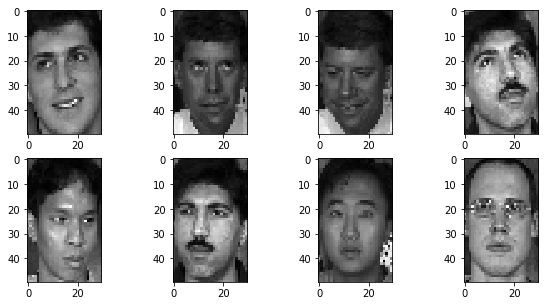

In [45]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()

# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()